In [64]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [65]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [66]:
pl.style.use('fabiostyle')

# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [67]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_across_session_vhpc'

In [68]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
#load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [69]:
from itertools import product
def load_all_animals_vars(varname, animal_list, sess, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/%s/notebooks/autorestore/%s/' % (ani, sess, notebook)
        try:
            all_of_them.update({ani: ut.load_variable(varname, folder)})
        except IOError:
            print "No %s file for %s in session %s (%s)."%(varname, ani, sess, notebook)
    return all_of_them

In [70]:
all_animals_vhpc =      'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'
pre_animals_vhpc =      'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'
post_animals_vhpc =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'
pre_rev_animals_vhpc =  'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'
post_rev_animals_vhpc = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'
catch_animals_vhpc =    'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'


In [72]:
#all periods, time bins, sessions, and mice
sessionA = 'pre','post','pre_rev','post_rev','catch'
sessionB = 'pre','post','pre_rev','post_rev','catch'
trial_type = 'sh_rw','sh_csm','rw_csm'
seconds='1a','1b','2'
trial_period = 'cs', 'tr', 
#sess_1,trial,period,time

for sess_1 in sessionA:
    for trial in trial_type:
        for time in seconds:
            for period in trial_period:
                try:
                    exec("scores_%s_%s_%s_%s = dict(zip(%s_animals, [ut.load_variable('perf_%s_%s_%s_%s',\
                                                                       '../%%s/notebooks/autorestore/decoding_all/'%%ani)\
                                                              for ani in %s_animals]))"%(sess_1,trial,period,time,sess_1,sess_1,trial,period,time,sess_1,))
                except:
                    print str(sess_1)+"_"+str(trial)+"_"+str(period)+"_"+str(time)+" did not complete"

sess_1_c=0                    
for sess_1 in sessionA:
    sess_1_c=sess_1_c+1
    sess_2_c=0
    for sess_2 in sessionB:
        sess_2_c=sess_2_c+1
        for trial in trial_type:
            for time in seconds:
                for period in trial_period:
                    if sess_1!=sess_2:
                        try:
                            exec("scores_%s%s_%s_%s_%s_%s = load_all_animals_vars('perf_%s_%s_%s_%s_%s_within', %s_animals, '', notebook='decoding_all')"%(sess_1,sess_2,sess_1,trial,period,time,sess_1,sess_2,trial,period,time,sess_1))
                            if sess_1_c < sess_2_c:
                                exec("scores_%s%s_%s_%s_%s = load_all_animals_vars('perf_%s_%s_%s_%s_%s_across', %s_animals, '', notebook='decoding_all')"%(sess_1,sess_2,trial,period,time,sess_1,sess_2,trial,period,time,sess_1))
                            
                            print str(sess_1)+"vs"+str(sess_2)+"_"+str(trial)+"_"+str(period)+"_"+str(time)+" was completed, yay!"
                        except:
                            print str(sess_1)+"vs"+str(sess_2)+"_"+str(trial)+"_"+str(period)+"_"+str(time)+" did not complete"



prevspost_sh_rw_cs_1a was completed, yay!
prevspost_sh_rw_tr_1a was completed, yay!
prevspost_sh_rw_cs_1b was completed, yay!
prevspost_sh_rw_tr_1b was completed, yay!
prevspost_sh_rw_cs_2 was completed, yay!
prevspost_sh_rw_tr_2 was completed, yay!
prevspost_sh_csm_cs_1a was completed, yay!
prevspost_sh_csm_tr_1a was completed, yay!
prevspost_sh_csm_cs_1b was completed, yay!
prevspost_sh_csm_tr_1b was completed, yay!
prevspost_sh_csm_cs_2 was completed, yay!
prevspost_sh_csm_tr_2 was completed, yay!
prevspost_rw_csm_cs_1a was completed, yay!
prevspost_rw_csm_tr_1a was completed, yay!
prevspost_rw_csm_cs_1b was completed, yay!
prevspost_rw_csm_tr_1b was completed, yay!
prevspost_rw_csm_cs_2 was completed, yay!
prevspost_rw_csm_tr_2 was completed, yay!
prevspre_rev_sh_rw_cs_1a was completed, yay!
prevspre_rev_sh_rw_tr_1a was completed, yay!
prevspre_rev_sh_rw_cs_1b was completed, yay!
prevspre_rev_sh_rw_tr_1b was completed, yay!
prevspre_rev_sh_rw_cs_2 was completed, yay!
prevspre_rev_s

In [73]:
def plot_no_reg(trial_type,period,time,):

#sess_1,trial,period,time
    fig, ax = pl.subplots(1, 1, figsize=(2, 2))

    exec("values = (100*np.concatenate(scores_pre_%s_%s_%s.values()), 100*np.concatenate(scores_post_%s_%s_%s.values()), 100*np.concatenate(scores_pre_rev_%s_%s_%s.values()), 100*np.concatenate(scores_post_rev_%s_%s_%s.values()))"%(trial_type,period,time,trial_type,period,time,trial_type,period,time,trial_type,period,time))
    pt.plot_bars(values, ax=ax, stderr=True)

    for ani in all_animals:
        exec("ax.plot(np.arange(len(values))+np.random.rand(len(values))*0.1-0.05, [np.mean(scores_pre_%s_%s_%s[ani]if ani in scores_pre_%s_%s_%s.keys() else -1)*100, np.mean(scores_post_%s_%s_%s[ani]if ani in scores_post_%s_%s_%s.keys() else -1)*100, np.mean(scores_pre_rev_%s_%s_%s[ani] if ani in scores_pre_rev_%s_%s_%s.keys() else -1)*100, np.mean(scores_post_rev_%s_%s_%s[ani] if ani in scores_post_rev_%s_%s_%s.keys() else -1)*100], 'o', mew=0, alpha=0.5, zorder=0, ms=3)"%(trial_type,period,time,trial_type,period,time,trial_type,period,time,trial_type,period,time,trial_type,period,time,trial_type,period,time,trial_type,period,time,trial_type,period,time))

    ax.set_xticks(range(4))
    ax.set_xticklabels(['Pre', 'Post', 'Pre_rev', 'Post_rev',])

    ax.hlines(50, -0.5, len(values)+.5-1, lw=1, zorder=0, linestyles='dashed', color='0.7')

    ax.set_ylim(0, 100)
    
    
    ax.set_ylabel('Decoding Performance Percent')
    exec("ax.set_title('Within Session %s %s %s seconds')"%(trial_type,period,time))

    ax.legend(all_animals,loc=[1.2, 0])
    #print "I don't think the colors assigned to each animal are consistent across sessions\n(some animals are not present in all sessions)"

    exec("fig.savefig('../img/%s__within_session_allcells_%s_%s_%s.pdf', bbox='tight')"%(NOTEBOOK_NAME,trial_type,period,time))

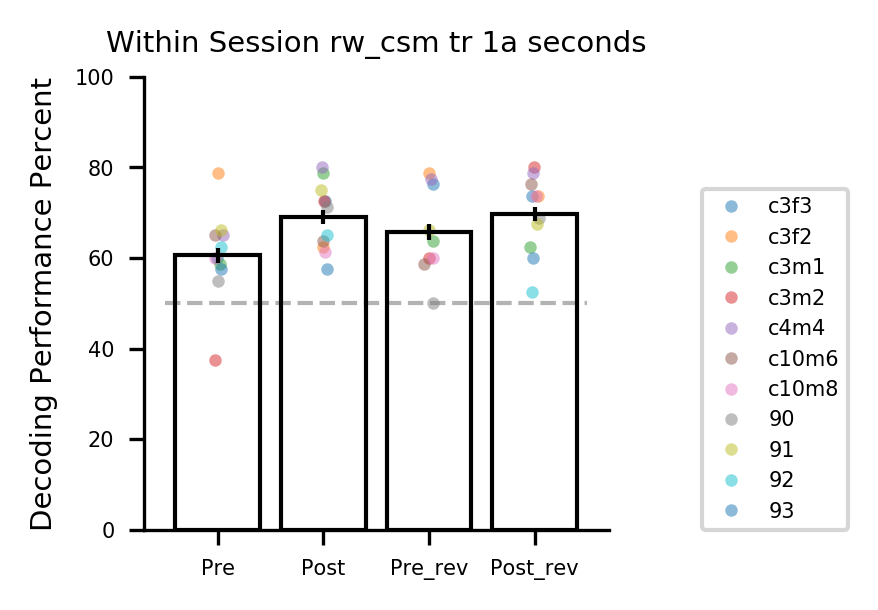

In [74]:
plot_no_reg('rw_csm','tr','1a')

In [75]:
def plot_reg(scores_pre, scores_post, scores_prepost, ax, labels=['Sess \n1', 'Sess\n2', 'Cross\nsession'],
            dots=False,):
    
    values = (100*np.concatenate(scores_pre.values()),
              100*np.concatenate(scores_post.values()),
              100*np.concatenate(scores_prepost.values()),)
    pt.plot_bars(values, ax=ax, stderr=True, colors=['0.7', '0.7', 'k'])

    ax.set_xticks(range(3))
    ax.set_xticklabels(labels, fontsize=4)
    axs[0].set_ylabel('Decoding Performance %')
    ax.set_ylim(0, 100)
    
    ax.hlines(50, -0.5, 2.5, lw=1, zorder=0, linestyles='dashed', color='0.7')

    ax.set_ylim(0, 100)
    
    if dots:
        for ani in scores_pre.keys():
            try:
                ax.plot(np.arange(len(values))+np.random.rand(len(values))*0.1-0.05,
                    [np.mean(scores_pre[ani])*100,
                         np.mean(scores_post[ani])*100,
                         np.mean(scores_prepost[ani])*100],            
                        'o', mew=0, alpha=0.5, zorder=0, ms=3)
            except:
                print ani

93
92
93
92


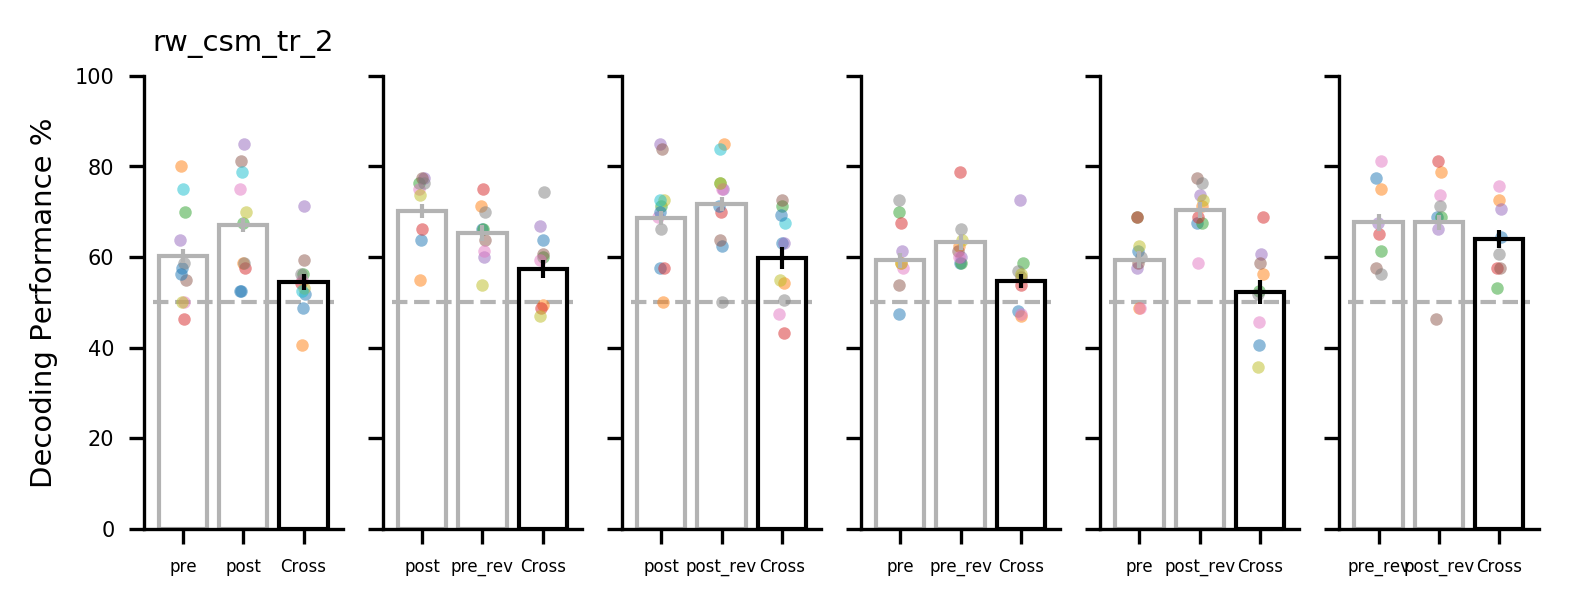

In [76]:
sess_to_plot = ['pre','post',
                'post','pre_rev',
                'post','post_rev',
                'pre','pre_rev',
                'pre','post_rev',
                'pre_rev','post_rev']
sess_param = 'rw_csm_tr_2'
dots = True

l_sub = 6 #sub_graphs to plot

fig, axs = pl.subplots(1, l_sub, figsize=(l_sub, 2), sharey=True)

for i in range(l_sub):
    if i==0:
        exec("plot_reg(scores_%s%s_%s_%s, scores_%s%s_%s_%s, scores_%s%s_%s, axs[i], labels=['%s', '%s', 'Cross'],dots=%s)"%(sess_to_plot[i],sess_to_plot[i+1],sess_to_plot[i],sess_param,sess_to_plot[i+1],sess_to_plot[i],sess_to_plot[i+1],sess_param,sess_to_plot[i],sess_to_plot[i+1],sess_param,sess_to_plot[i],sess_to_plot[i+1],dots))
    else:
        exec("plot_reg(scores_%s%s_%s_%s, scores_%s%s_%s_%s, scores_%s%s_%s, axs[i], labels=['%s', '%s', 'Cross'],dots=%s)"%(sess_to_plot[(i*2)],sess_to_plot[1+i*2],sess_to_plot[i*2],sess_param,sess_to_plot[1+i*2],sess_to_plot[i*2],sess_to_plot[1+i*2],sess_param,sess_to_plot[i*2],sess_to_plot[1+i*2],sess_param,sess_to_plot[i*2],sess_to_plot[2*i+1],dots))

axs[0].set_title(sess_param)

axs[0].legend(all_animals,loc=[5, 0])
        
# fig.savefig('../img/%s__across_session_cellreg.pdf'%NOTEBOOK_NAME, bbox='tight')

# fig.savefig('../img/%s__across_session_cellreg.pdf'%NOTEBOOK_NAME, bbox='tight')

In [37]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
